# Chapter 3

In [134]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels import api
import statsmodels.formula.api as smf
import pandas as pd
# from IPython.display import display
import numpy as np
import sys
sys.path.append("../")

# from dstools.evaluate import ols
from scipy.stats import norm
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
sns.set_theme = 'ticks'

## Applied

### 8. `Auto`的OLS

This question involves the use of simple linear regression on theAutodata set.

(a) Use the `lm()` function to perform a simple linear regression withmpgas the response and `horsepower` as the predictor. Use the `summary()` function to print the results. Comment on the output. For example:

i.Is there a relationship between the predictor and the re-sponse?

> 是。

ii.How strong is the relationship between the predictor and the response?

> 有影响。

iii.Is the relationship between the predictor and the response positive or negative?

> negative.




In [135]:
auto = pd.read_csv("datasets/Auto.csv")
auto_ols_df = auto[auto['horsepower'] != "?"]
auto_ols_df['horsepower'] = auto_ols_df.horsepower.astype(float)
auto_ols_model = api.OLS(
    auto_ols_df["mpg"],
    api.add_constant(auto_ols_df.horsepower)
).fit()
auto_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           7.03e-81
Time:                        17:58:48   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

iv.What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95 % confidence and prediction intervals?

> 24


In [36]:
prediction_horspower_of_98 = auto_ols_model.predict(np.array([1, 98]))

se = auto_ols_model.scale
print(
    se, 
    " (",
    se + norm.ppf(0.25) * se,
    ", ",
    se + norm.ppf(0.975) * se,
    ")", sep=""
)

24.06645095367287 (7.833876461823802, 71.23582805857134)


(b) Plot the response and the predictor. Use the `abline()` function to display the least squares regression line.

D:\ProgramData\Anaconda3\envs\stats\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


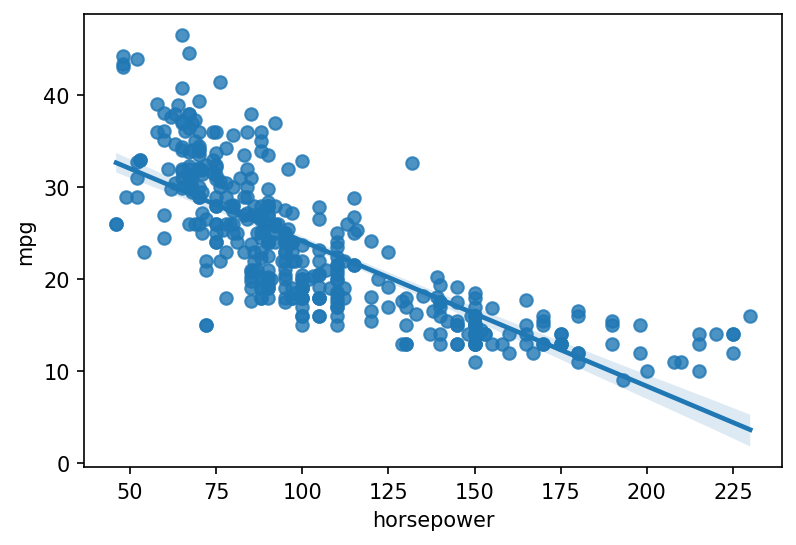

In [43]:
sns.regplot("horsepower", "mpg", data=auto_ols_df, )

(c)Use the `plot()` function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

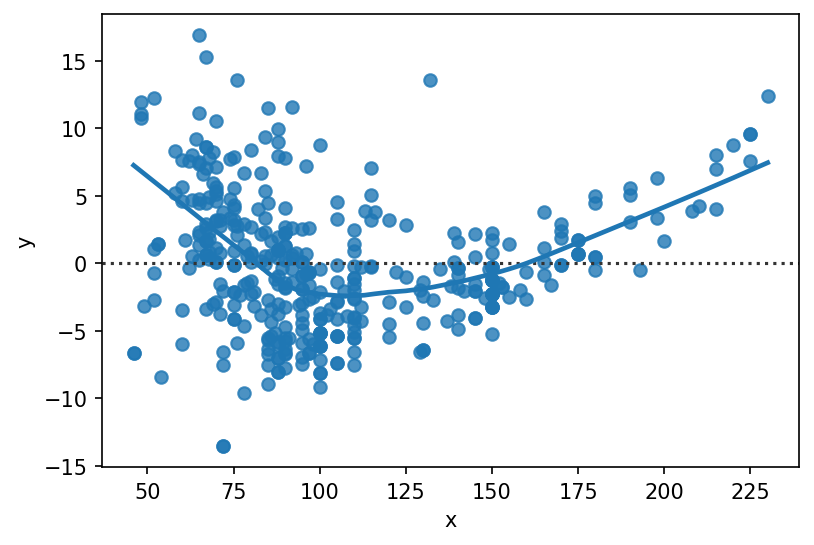

In [61]:
sns.residplot(
    x="x",
    y="y",
    data=pd.DataFrame(
        {
            "x": auto_ols_df.horsepower,
            "y": auto_ols_df.mpg
        }
    ),
    lowess=True
)

> 明显存在误差项自相关

### 9 `Auto`的多元线性回归

This question involves the use of multiple linear regression on the `Auto` data set.

(a) Produce a scatterplot matrix which includes all of the variablesin the data set.


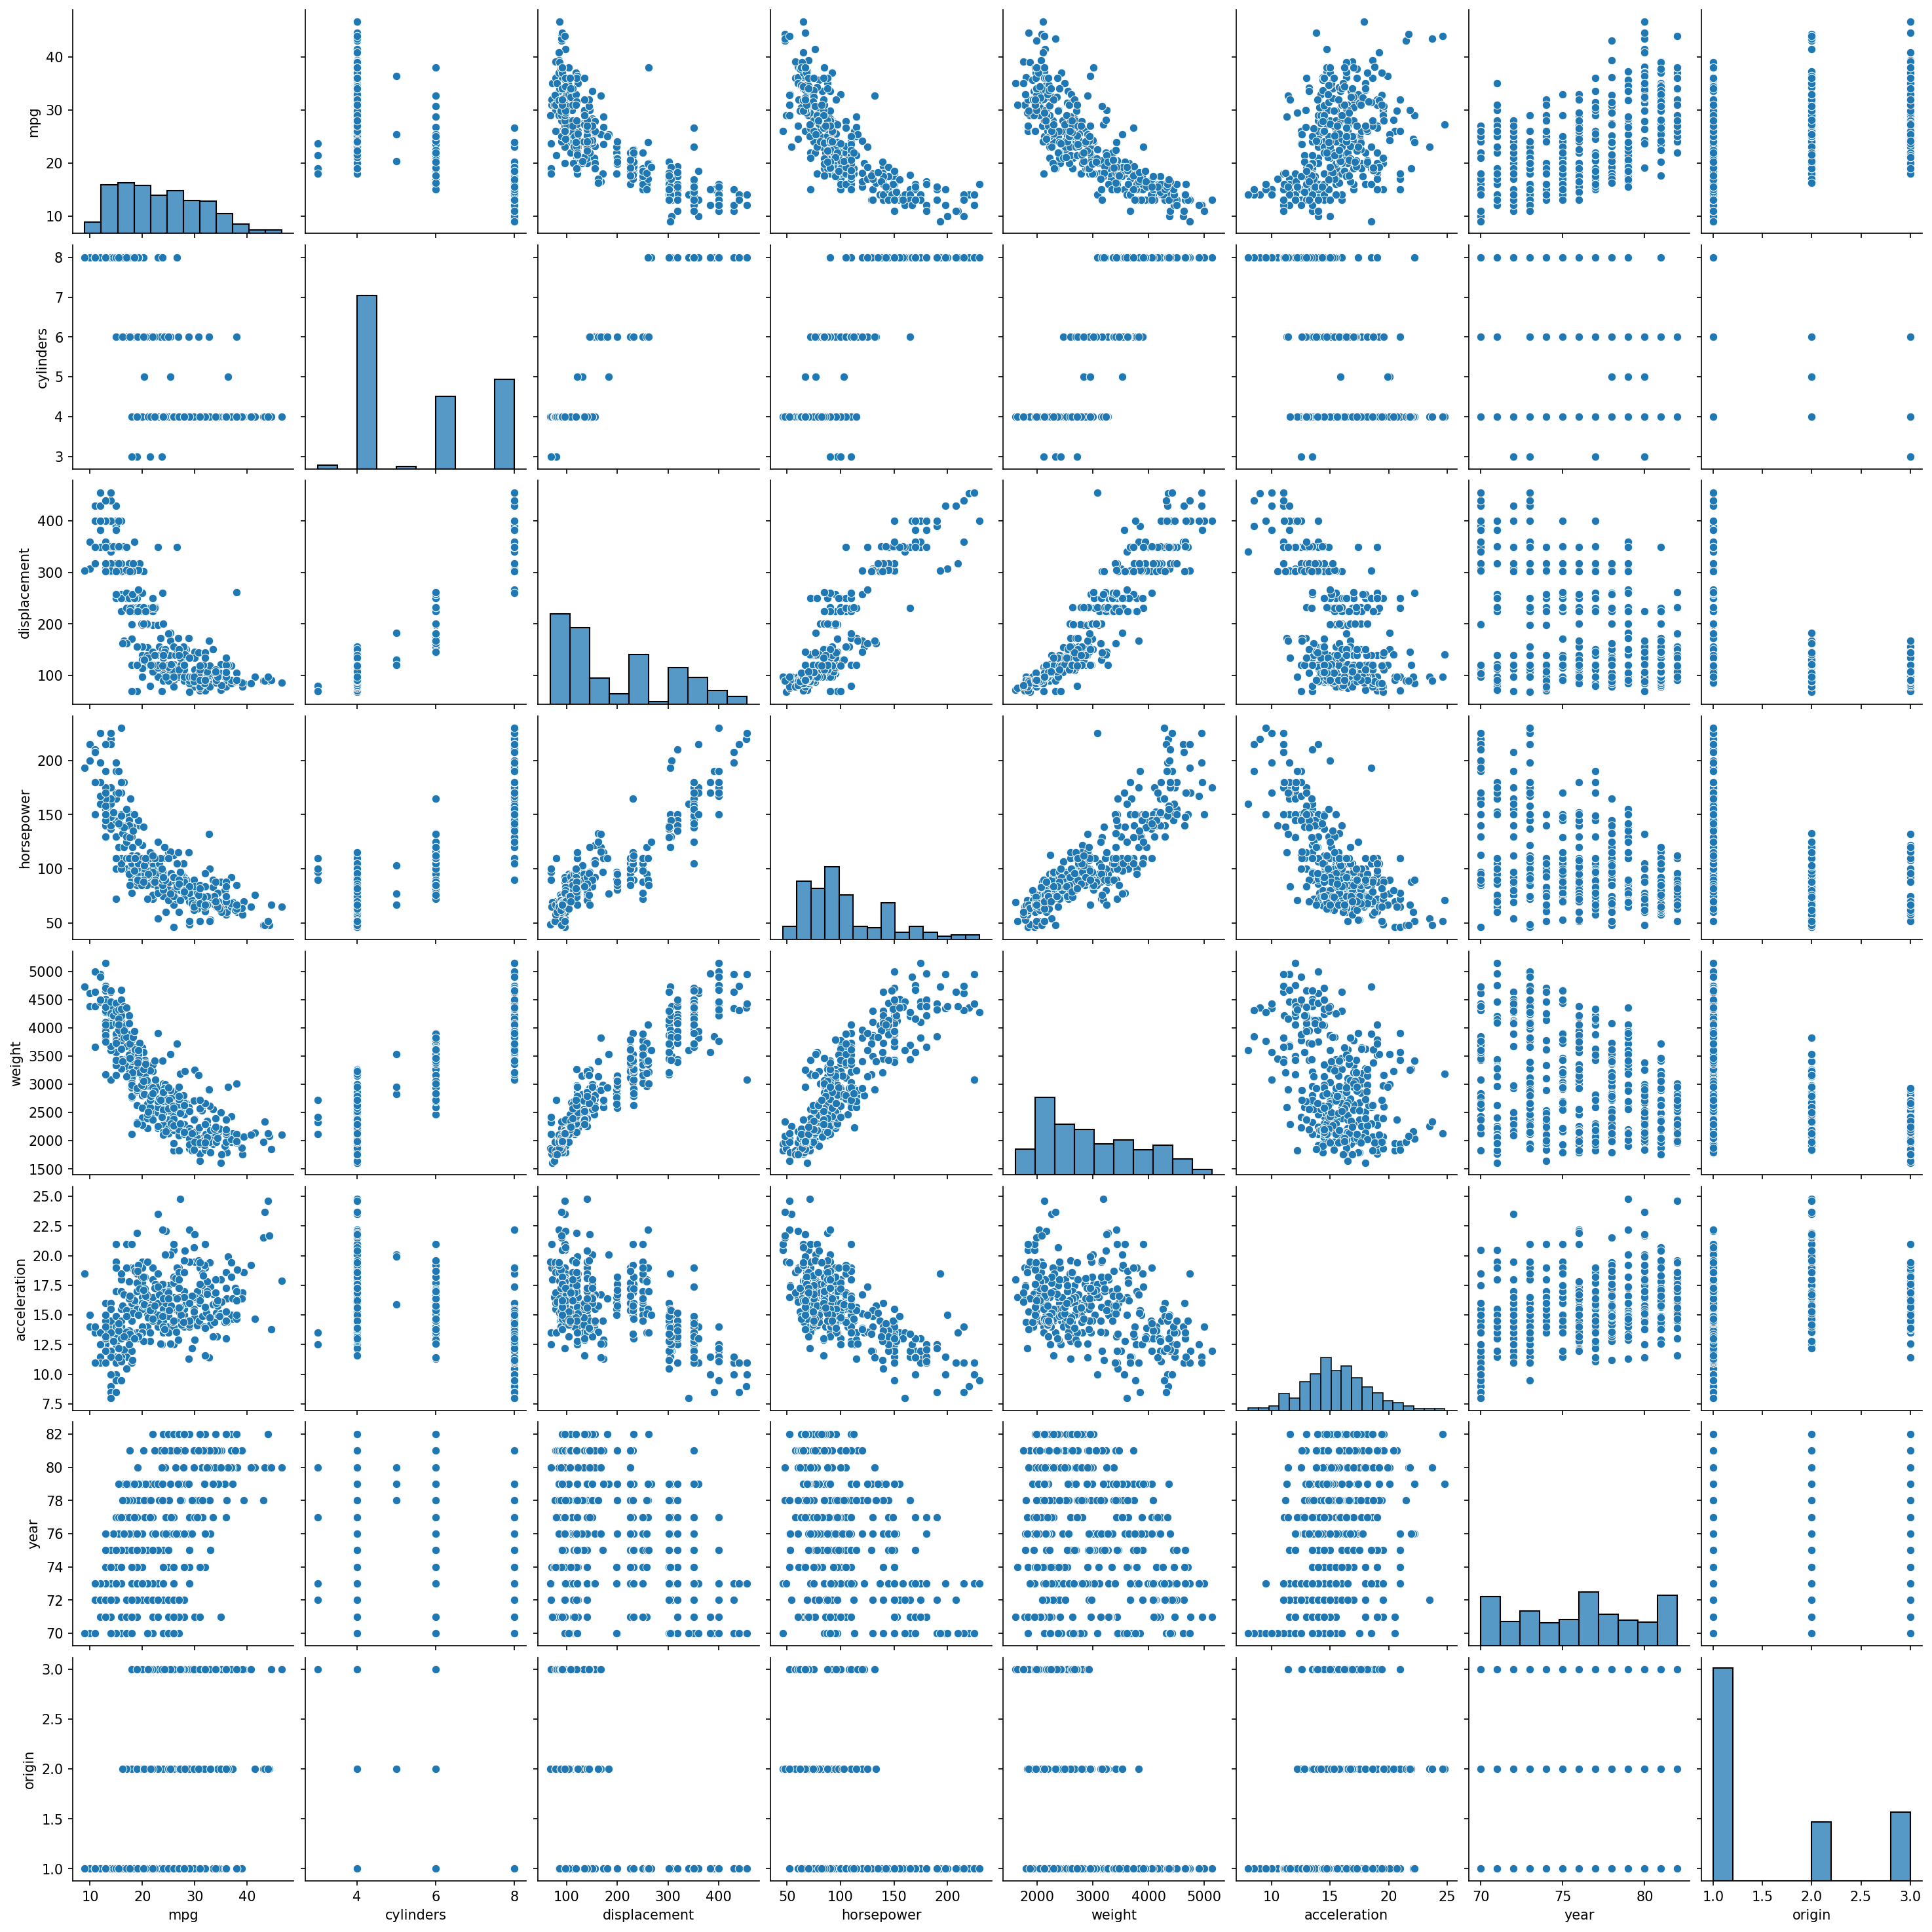

In [62]:
sns.pairplot(auto_ols_df)

(b) Compute the matrix of correlations between the variables usingthe function `cor()`. You will need to exclude the `name` variable, which is qualitative.

In [64]:
auto_ols_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


(c) Use the `lm()` function to perform a multiple linear regression with `mpg` as the response and all other variables exceptnameasthe predictors. Use the `summary()` function to print the results. Comment on the output. For instance:

i. Is there a relationship between the predictors and the response?

> yes

ii. Which predictors appear to have a statistically significant relationship to the response?

> `displacement`, `weight`, `year`, `origin`

iii. What does the coefficient for the `year` variable suggest?

> newer, more is mpg

In [72]:
X_columns = [name for name in auto_ols_df.columns if name not in {'name', 'mpg'}]

auto_all_features_ols_model = api.OLS(
    auto_ols_df['mpg'],
    api.add_constant(auto_ols_df[X_columns].values)
    ).fit()
auto_all_features_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          2.04e-139
Time:                        16:08:25   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.2184      4.644     -3.707      0.000     -26.350      -8.087
x1            -0.4934      0.323     -1.526      0.128      -1.129       0.142
x2             0.0199      0.008      2.647      0.008       0.005       0.035
x3            -0.0170      0.014     -1.230      0.220      -0.044       0.010
x4            -0.0065      0.001     -9.929      0.000      -0.008      -0.005
x5             0.0806      0.099      0.815      0.415      -0.114       0.275
x6             0.7508      0.051     14.729      0.000       0.651       0.851
x7             1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(d) Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

> 有误差项自相关问题，存在蛮多杠杆点。


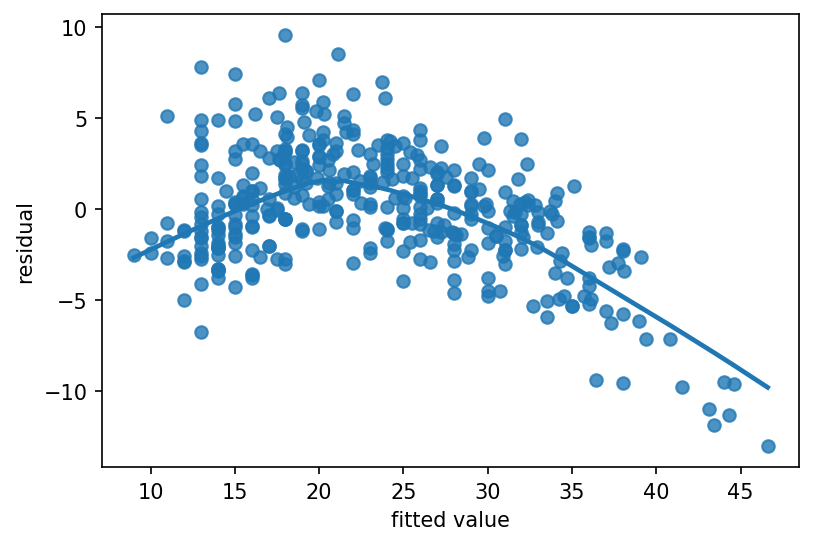

In [136]:
y_pred = auto_all_features_ols_model.predict(
    api.add_constant(auto_ols_df[X_columns].values)
)

reg_df = pd.DataFrame(
    {
        "fitted value": auto_ols_df['mpg'],
        'residual': (y_pred - auto_ols_df['mpg'])
    }
)

sns.regplot("fitted value", "residual", reg_df, lowess=True)

(e) Use the `*` and `:` symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

> 不是所有，但是减去几个即可。

In [95]:
smf.ols(
    (
        "mpg ~ "
        "cylinders*displacement*horsepower*weight "
        "- displacement:horsepower:weight "
        "- cylinders:displacement "
        "- horsepower "
        "- cylinders:horsepower "
        "- cylinders:displacement:horsepower:weight "
        "- displacement:weight "
        "- weight "
        "- cylinders "
        "+ year + origin"
    ), 
    auto_ols_df
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     279.6
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          4.11e-162
Time:                        16:47:00   Log-Likelihood:                -963.97
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     382   BIC:                             1988.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -11.7672      3.649     -3.225      0.001     -18.942      -4.592
displacement                         -0.1001      0.025     -4.064      0.000      -0.149      -0.052
displacement:horsepower               0.0015      0.000      3.988      0.000       0.001       0.002
cylinders:displacement:horsepower    -0.0002   3.68e-05     -4.146      0.000      -0.000   -8.02e-05
cylinders:weight                     -0.0006      0.000     -2.657      0.008      -0.001      -0.000
cylinders:displacement:weight      2.068e-06   3.61e-07      5.737      0.000    1.36e-06    2.78e-06
horsepower:weight                    -0.0001   1.51e-05     -8.083      0.000      -0.000   -9.22e-05
cylinders:horsepower:weight        1.233e-05   1.97e-06      6.243      0.000    8.44e-06    1.62e-05
year                                  0.7722      0.043     17.764      0.000       0.687       0.858
origin                                0.6407      0.255      2.512      0.012       0.139       1.142
==============================================================================
Omnibus:                       49.168   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.330
Skew:                           0.680   Prob(JB):                     3.65e-23
Kurtosis:                       5.116   Cond. No.                     1.77e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(f) Try a few different transformations of the variables, such as $log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

### 10. `Carseat`数据集

This question should be answered using the `Carseats` data set.

(a) Fit a multiple regression model to predictSalesusingPrice,Urban, andUS.

In [99]:
carseats = pd.read_csv("datasets/Carseats.csv")

carseats_m1 = smf.ols("Sales ~ Price + Urban + US", carseats).fit()

carseats_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           2.39e-23
Time:                        16:58:39   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b)Provide an interpretation of each coefficient in the model. Be careful——some of the variables in the model are qualitative!

> US、Price都是正相关。但Urban无效

(c ) Write out the model in equation form, being careful to handle the qualitative variables properly.

> ${Sales} = 13.0435 - 0.0219{Urban} + 1.2006{US} - 0.05{Price}$

(d) For which of the predictors can you reject the null hypothesis $H_0:β_j= 0$?

> `Urban`

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [100]:
carseats_m2 = smf.ols("Sales ~ Price + US", carseats).fit()

carseats_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           2.66e-24
Time:                        17:12:42   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(f) How well do the models in (a) and (e) fit the data?

> 有略微改善。

(g) Using the model from (e), obtain 95 % confidence intervals forthe coefficient(s).

> US: [0.692, 1.708]; Price: [-0.065, -0.044]

(h) Is there evidence of outliers or high leverage observations in themodel from (e)?

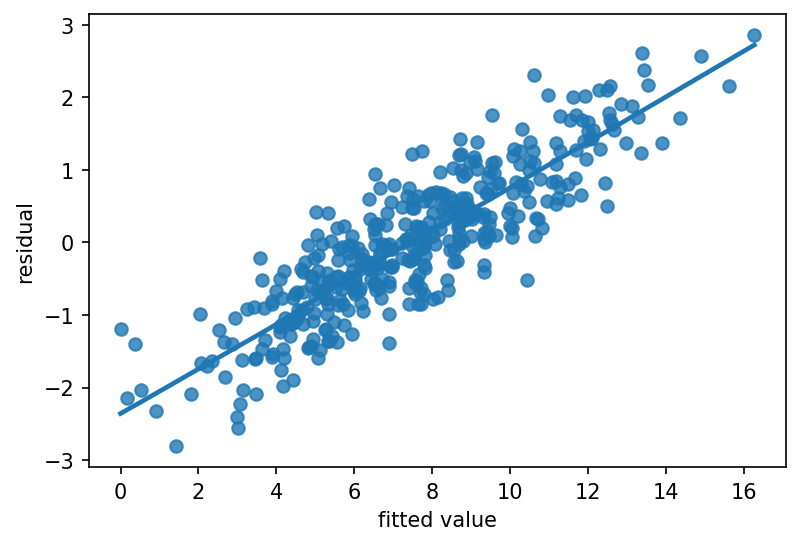

In [137]:
reg_df = pd.DataFrame(
    {
        "fitted value": carseats["Sales"],
        'residual': carseats_m2.resid_pearson
    }
)

sns.regplot("fitted value", "residual", reg_df, lowess=True)

## 11. t-统计量

In this problem we will investigate thet-statistic for the null hypothesis $H_0: β= 0$ in simple linear regression without an intercept. To begin, we generate a predictor $x$ and a response $y$ as follows.

```r
> set.seed(1)
> x <- rnorm(100)
> y <- 2 * x + rnorm(100)
```

In [128]:
np.random.seed(seed=1)
x = norm.rvs(size=100)
y = 2 * x + norm.rvs(size=100)

(a) Perform a simple linear regression ofyontox, without an intercept. Report the coefficient estimateˆβ, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothes is $H_0:β= 0$. Comment on these results. (You can perform regression without an intercept using the command `lm(y∼x+0)`.)

> 拒绝$H_0$假设，参数是`2.1067`

In [131]:
t_df = pd.DataFrame({'x': x, 'y': y})

t_model = smf.ols("y ~ x + 0", t_df).fit()
t_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Thu, 28 Oct 2021   Prob (F-statistic):                    3.46e-36
Time:                        17:38:24   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Now perform a simple linear regression of `x` on to `y` without an intercept, and report the coefficient estimate, its standard error,and the corresponding t-statistic and p-values associated with the null hypothesis $H_0:β= 0$. Comment on these results.

> 拒绝$H_0$假设，参数是`0.3789`

In [132]:
t_model_reverse = smf.ols("x ~ y + 0", t_df).fit()
t_model_reverse.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Thu, 28 Oct 2021   Prob (F-statistic):                    3.46e-36
Time:                        17:41:35   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(c) What is the relationship between the results obtained in (a) and(b)?

> t统计量一模一样。

(d) For the regression of $Y$ onto $X$ without an intercept, the t-statistic for $H_0:β = 0$ takes the form $\hat{β}/SE(\hat{β})$, where $\hat{β}$ is given by (3.38), and where 

$$
SE(\hat{β})= \sqrt{
    \frac{
        \sum^n_{i=1}(y_i−x_i\hat{β})^2
        }{
        (n−1)\sum^n_{i^′=1}x^2_{i^′}
    }
}
$$

(These formulas are slightly different from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numerically in R, that the t-statistic can be written as

$$
\frac 
    {(\sqrt{n−1})\sum^n_{i=1}x_iy_i}
    {\sqrt{
        (\sum^n_{i=1}x^2_i)(\sum^n_{i^′=1}y^2i^′)−(\sum^n_{i′=1}x_{i^′}y_{i^′})^2
    }}
$$

In [140]:
t_stats = np.sqrt(100 - 1) * sum(x * y) /\
    np.sqrt(
        sum(x ** 2) * sum(y ** 2)- sum(x * y) ** 2
    )
t_stats

19.791801987091272

(e) Using the results from (d), argue that the t-statistic for the regression of $y$ onto $x$ is the same as the t-statistic for the regression of $x$ onto $y$.

> 因为算式是对称的。

(f) In `R`, show that when regression is performed with an intercept,the t-statistic for $H_0:β_1= 0$ is the same for the regression of $y$ onto $x$ as it is for the regression of $x$ onto $y$.
